# linear regression

## 加载数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为SimHei（黑体）
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [2]:
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv('./data/shopping_trends.csv')
dataset.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
# 定义中文表头
chinese_headers = {
    'Customer ID': '顾客ID',
    'Age': '顾客年龄',
    'Gender': '顾客性别',
    'Item Purchased': '购买的商品',
    'Category': '商品类别',
    'Purchase Amount (USD)': '购买金额（美元）',
    'Location': '顾客所在地区',
    'Size': '商品尺码',
    'Color': '商品颜色',
    'Season': '购买季节',
    'Review Rating': '商品评分',
    'Subscription Status': '是否订阅',
    'Payment Method': '支付方式',
    'Shipping Type': '配送方式',
    'Discount Applied': '是否使用折扣',
    'Promo Code Used': '是否使用促销码',
    'Previous Purchases': '之前的购买次数',
    'Preferred Payment Method': '首选支付方式',
    'Frequency of Purchases': '购买频率'
}

# 重命名表头
origin_data = dataset.copy()
origin_data.rename(columns=chinese_headers, inplace=True)
origin_data.head(5)

,顾客ID,顾客年龄,顾客性别,购买的商品,商品类别,购买金额（美元）,顾客所在地区,商品尺码,商品颜色,购买季节,商品评分,是否订阅,支付方式,配送方式,是否使用折扣,是否使用促销码,之前的购买次数,首选支付方式,购买频率
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## 查看原始数据基本信息

### 数据大小

In [6]:
origin_data.shape

(3900, 19)

In [7]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   顾客ID      3900 non-null   int64  
 1   顾客年龄      3900 non-null   int64  
 2   顾客性别      3900 non-null   object 
 3   购买的商品     3900 non-null   object 
 4   商品类别      3900 non-null   object 
 5   购买金额（美元）  3900 non-null   int64  
 6   顾客所在地区    3900 non-null   object 
 7   商品尺码      3900 non-null   object 
 8   商品颜色      3900 non-null   object 
 9   购买季节      3900 non-null   object 
 10  商品评分      3900 non-null   float64
 11  是否订阅      3900 non-null   object 
 12  支付方式      3900 non-null   object 
 13  配送方式      3900 non-null   object 
 14  是否使用折扣    3900 non-null   object 
 15  是否使用促销码   3900 non-null   object 
 16  之前的购买次数   3900 non-null   int64  
 17  首选支付方式    3900 non-null   object 
 18  购买频率      3900 non-null   object 
dtypes: float64(1), int64(4), object(14)
memory usage: 579.0+ KB


### 缺失值

In [8]:
print(f'查看缺失值:{origin_data.isnull().sum()}')

查看缺失值:顾客ID        0
顾客年龄        0
顾客性别        0
购买的商品       0
商品类别        0
购买金额（美元）    0
顾客所在地区      0
商品尺码        0
商品颜色        0
购买季节        0
商品评分        0
是否订阅        0
支付方式        0
配送方式        0
是否使用折扣      0
是否使用促销码     0
之前的购买次数     0
首选支付方式      0
购买频率        0
dtype: int64


### 重复值

In [9]:
print(f'查看重复值:{origin_data.duplicated().sum()}')

查看重复值:0


### 异常值检查

#### 类别

In [11]:
# 选择所有分类变量的唯一值情况
characteristic = origin_data.select_dtypes(include=['object']).columns.tolist() 
print('数据中分类变量的唯一值情况：')
for i in characteristic:
    print(f'{i}:')
    print(f'共有:{len(origin_data[i].unique())}条唯一值')
    print(origin_data[i].unique())
    print('**'*50)

数据中分类变量的唯一值情况：
顾客性别:
共有:2条唯一值
['Male' 'Female']
****************************************************************************************************
购买的商品:
共有:25条唯一值
['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']
****************************************************************************************************
商品类别:
共有:4条唯一值
['Clothing' 'Footwear' 'Outerwear' 'Accessories']
****************************************************************************************************
顾客所在地区:
共有:50条唯一值
['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'In

#### 数值类型

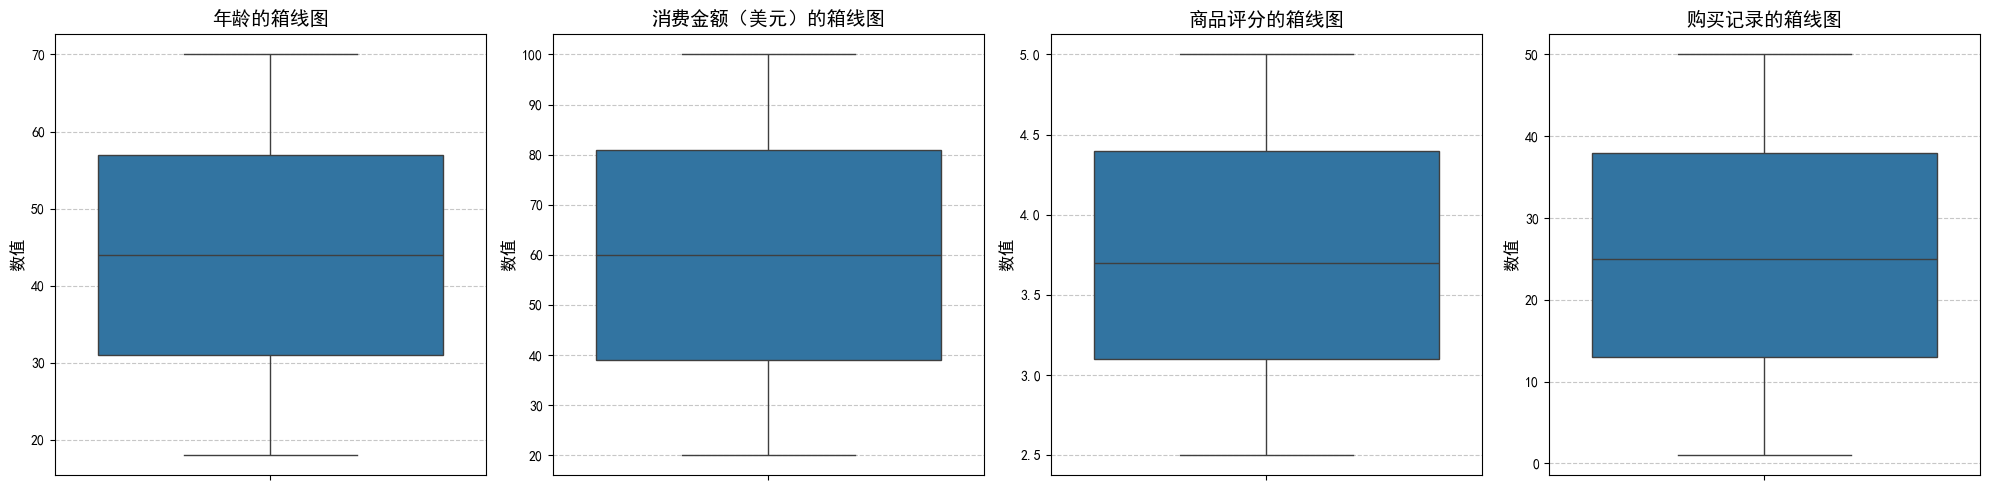

In [12]:
feature_map = {
    '顾客年龄': '年龄',
    '购买金额（美元）': '消费金额（美元）',
    '商品评分': '商品评分',
    '之前的购买次数': '购买记录'
}
plt.figure(figsize=(20, 5))

for i, (col, col_name) in enumerate(feature_map.items(), 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=origin_data[col])
    plt.title(f'{col_name}的箱线图', fontsize=14)
    plt.ylabel('数值', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 数据分析

### 描述性分析

In [13]:
origin_data.describe().T

,count,mean,std,min,25%,50%,75%,max
顾客ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
顾客年龄,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
购买金额（美元）,3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
商品评分,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
之前的购买次数,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


#### 顾客基本情况

NameError: name 'orgin_data' is not defined

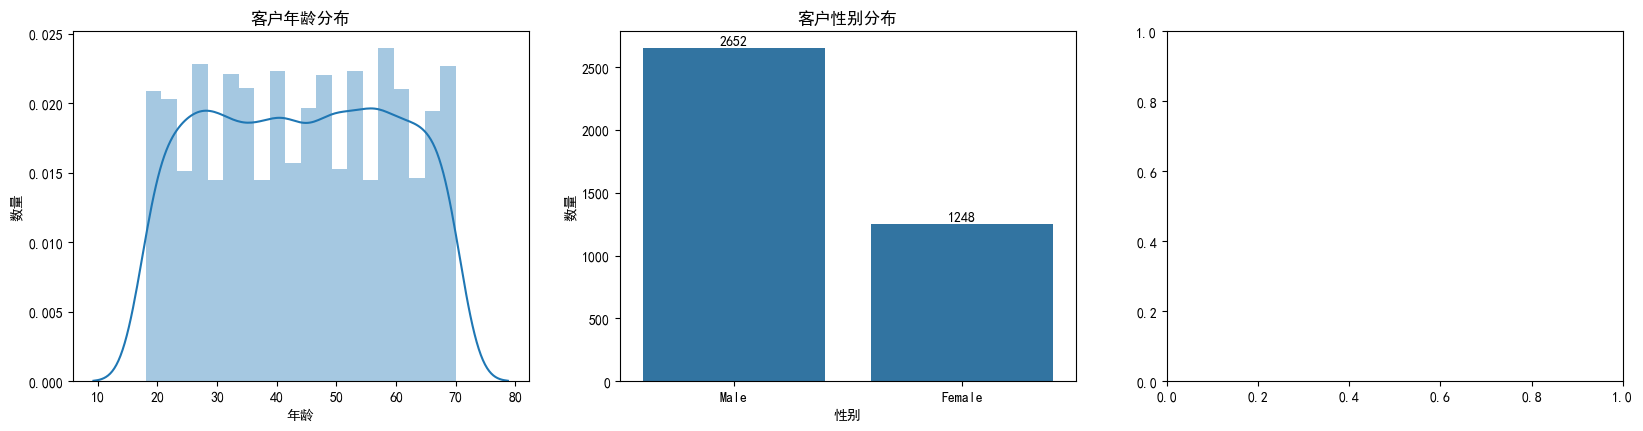

In [14]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
#绘制客户年龄的直方图
sns.distplot(origin_data['顾客年龄'],kde=True, bins=20,label='客户年龄')
plt.xlabel('年龄')
plt.ylabel('数量')
plt.title('客户年龄分布')


plt.subplot(2, 3, 2)
#绘制客户性别占比的柱状图
sns.countplot(x='顾客性别', data=origin_data)
plt.xlabel('性别')
plt.ylabel('数量')
plt.title('客户性别分布')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
    
    
plt.subplot(2, 3, 3)
#绘制客户性别分布的饼图
plt.pie(orgin_data['顾客性别'].value_counts(), labels=['男性', '女性'], autopct='%1.1f%%', startangle=90, colors=['green', 'orange'])
plt.title('客户性别分布')
plt.axis('equal')



plt.subplot(2, 3, (4, 6))
#绘制location的分布柱状图
plt.bar (origin_data['顾客所在地区'].value_counts().index, origin_data['顾客所在地区'].value_counts().values)
plt.xlabel('区域')
plt.xticks(rotation=45)
plt.ylabel('数量')
plt.title('区域分布')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.tight_layout()
plt.show()

#### 顾客购买的商品情况

NameError: name 'orgin_data' is not defined

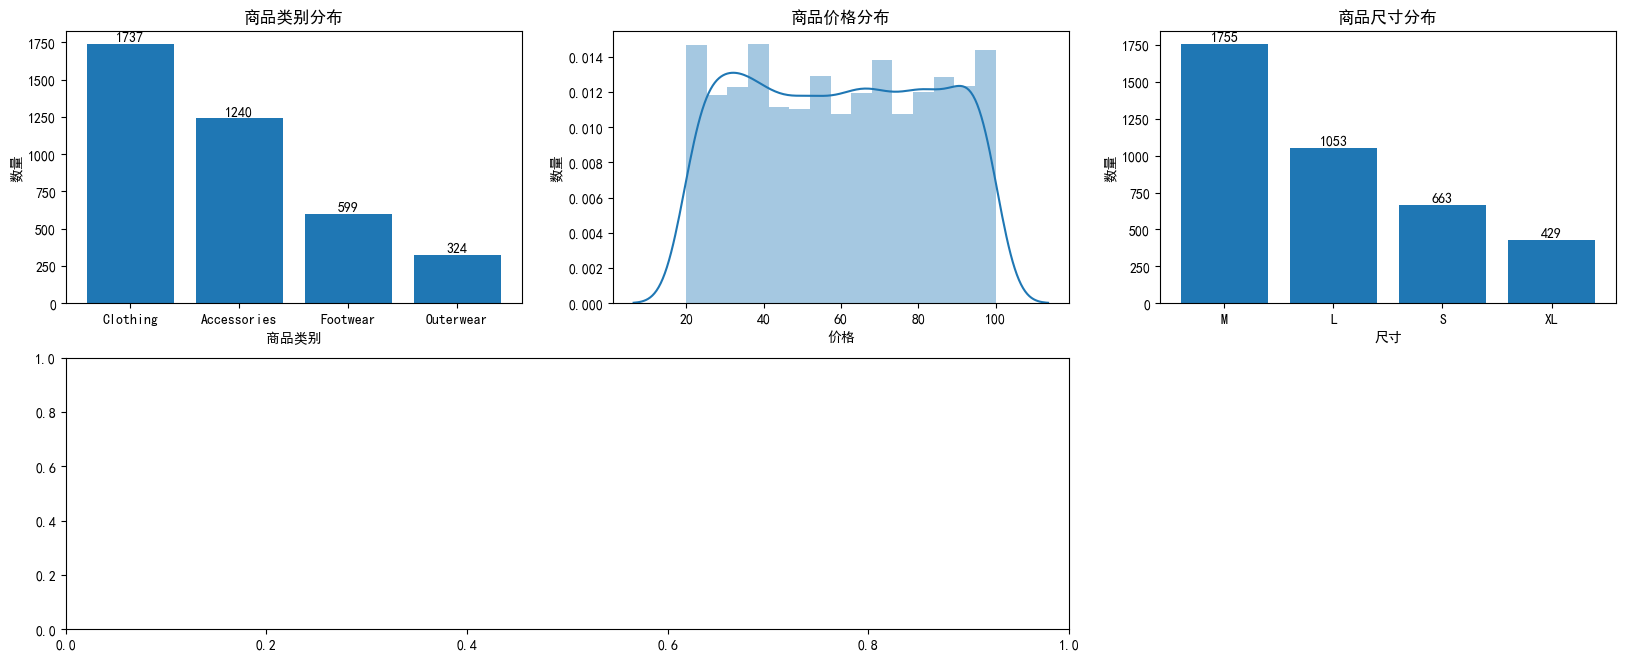

In [15]:
plt.figure(figsize=(20, 12))

plt.subplot(3, 3, 1)
#绘制购买商品的种类分布柱状图
category_count = origin_data['商品类别'].value_counts()
plt.bar(x=category_count.index, height=category_count.values)
plt.title('商品类别分布')
plt.xlabel('商品类别')
plt.ylabel('数量')
for p in plt.gca ().patches:
    plt.gca ().annotate (str (p.get_height ()), (p.get_x () + p.get_width () / 2., p.get_height ()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(3, 3, 2)
#绘制购买商品的价格分布直方图
sns.distplot(origin_data['购买金额（美元）'], kde=True)
plt.title('商品价格分布')
plt.xlabel('价格')
plt.ylabel('数量')

plt.subplot(3, 3, 3)
#绘制购买商品的尺寸分布直方图
plt.bar(x=origin_data['商品尺码'].value_counts().index, height=origin_data['商品尺码'].value_counts().values)
plt.title('商品尺寸分布')
plt.xlabel('尺寸')
plt.ylabel('数量')
for p in plt.gca ().patches:
    plt.gca ().annotate (str (p.get_height ()), (p.get_x () + p.get_width () / 2., p.get_height ()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(3, 3, (4, 5))
#绘制购买商品的颜色分布直方图
plt.bar(x=orgin_data['商品颜色'].value_counts().index, height=origin_data['商品颜色'].value_counts().values)
plt.title('商品颜色分布')
plt.xlabel('颜色')
plt.ylabel('数量')
for p in plt.gca ().patches:
    plt.gca ().annotate (str (p.get_height ()), (p.get_x () + p.get_width () / 2., p.get_height ()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(3, 3, 6)
#绘制购买商品的季节分布直方图
plt.bar(x=origin_data['购买季节'].value_counts().index, height=origin_data['购买季节'].value_counts().values)
plt.title('商品季节分布')
plt.xlabel('季节')
plt.ylabel('数量')
for p in plt.gca ().patches:
    plt.gca ().annotate (str (p.get_height ()), (p.get_x () + p.get_width () / 2., p.get_height ()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.subplot(3, 3, (7, 9))
#绘制商品类别的分布图
plt.bar(x=origin_data['购买的商品'].value_counts().index, height=origin_data['购买的商品'].value_counts().values)
plt.title('购买的商品分布')
plt.xlabel('购买的商品')
plt.ylabel('数量')
for p in plt.gca ().patches:
    plt.gca ().annotate (str (p.get_height ()), (p.get_x () + p.get_width () / 2., p.get_height ()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()

#### 顾客购买习惯分析

In [ ]:
plt.figure(figsize=(20, 12))

plt.subplot(3,4,1)
#绘制评分分布直方图
sns.distplot(origin_data['商品评分'], bins=20, kde=True)
plt.title('商品评分分布直方图')
plt.xlabel('评分')
plt.ylabel('频数')

plt.subplot(3,4,2)
#绘制订阅状态分布柱状图
plt.bar(x=origin_data['是否订阅'].value_counts().index, height=origin_data['是否订阅'].value_counts().values)
plt.title('订阅状态分布柱状图')
plt.xlabel('订阅状态')
plt.ylabel('频数')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(3,4,3)
#绘制折扣申请分布直方图
plt.bar(x=origin_data['是否使用折扣'].value_counts().index, height=origin_data['是否使用折扣'].value_counts().values)
plt.title('折扣申请分布直方图')
plt.xlabel('折扣申请')
plt.ylabel('频数')
for p in plt.gca().patches: 
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(3,4,4)
#绘制促销码使用分布直方图
plt.bar(x=origin_data['是否使用促销码'].value_counts().index, height=origin_data['是否使用促销码'].value_counts().values)
plt.title('促销码使用分布直方图')
plt.xlabel('促销码使用')
plt.ylabel('频数')
for p in plt.gca().patches: 
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(3,4,(5,6))
#绘制运输类型分布直方图
plt.bar(x=origin_data['配送方式'].value_counts().index, height=origin_data['配送方式'].value_counts().values)
plt.title('运输类型分布直方图')
plt.xlabel('运输类型')
plt.ylabel('频数')
for p in plt.gca().patches: 
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(3,4,(7,8))
#绘制付款方式分布直方图
plt.bar(x=origin_data['支付方式'].value_counts().index, height=origin_data['支付方式'].value_counts().values)
plt.title('付款方式分布直方图')
plt.xlabel('付款方式')
plt.ylabel('频数')
for p in plt.gca().patches: 
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(3,4,(9,11))
#绘制购买频率分布直方图
plt.bar(x=origin_data['购买频率'].value_counts().index, height=origin_data['购买频率'].value_counts().values)
plt.title('购买频率分布直方图')
plt.xlabel('购买频率')
plt.ylabel('频数')  
for p in plt.gca().patches: 
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(3,4,12)
plt.bar(x=origin_data['首选支付方式'].value_counts().index, height=origin_data['首选支付方式'].value_counts().values)
plt.title('首选支付方式分布柱状图')
plt.xlabel('首选支付方式')
plt.ylabel('频数')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()

## 探索性分析

In [16]:
data = dataset

### 不同性别顾客的消费金额分析

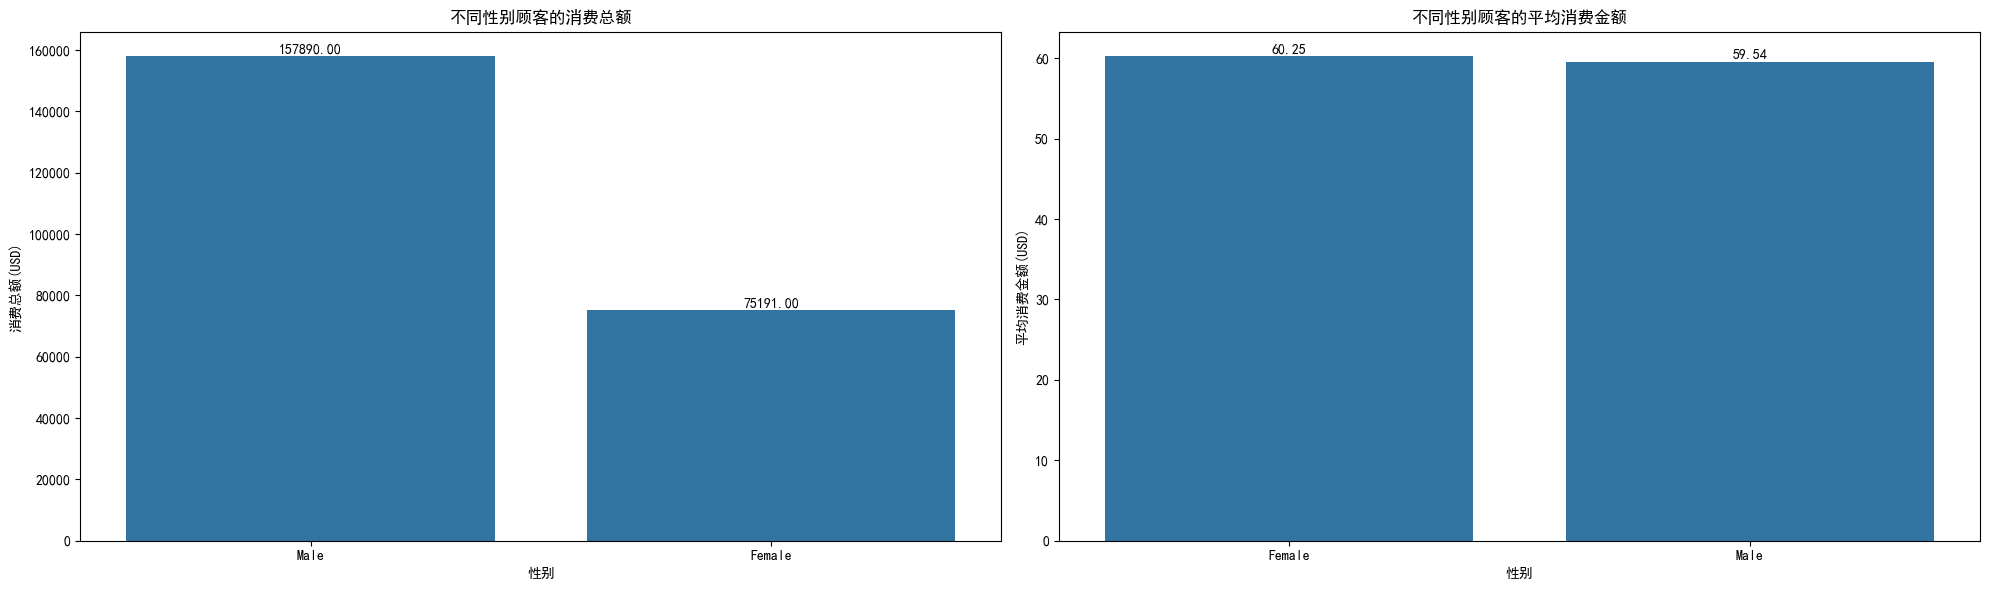

In [17]:
gender_sales = data.groupby('Gender')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
gender_avg_purchase = data.groupby('Gender')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=gender_sales.index, y=gender_sales.values)
plt.title('不同性别顾客的消费总额')
plt.xlabel('性别')
plt.ylabel('消费总额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(1, 2, 2)
sns.barplot(x=gender_avg_purchase.index, y=gender_avg_purchase.values)
plt.title('不同性别顾客的平均消费金额')
plt.xlabel('性别')
plt.ylabel('平均消费金额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()

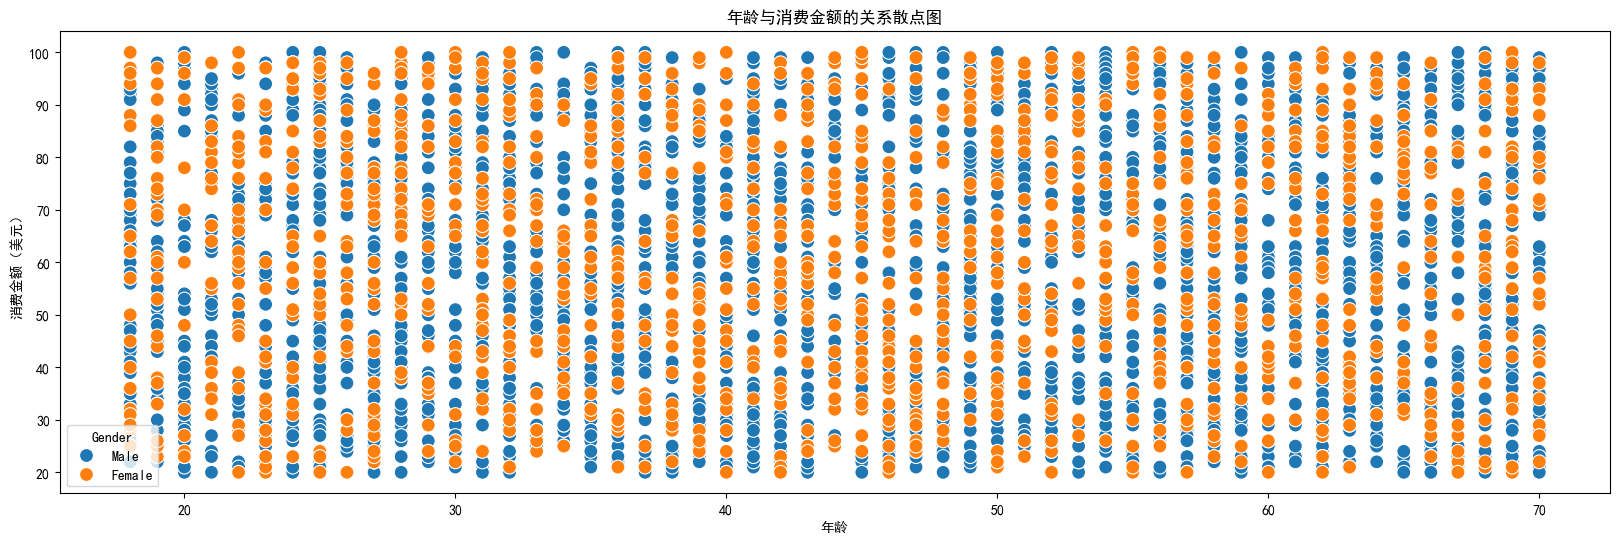

In [18]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Age', y='Purchase Amount (USD)', hue='Gender', data=data, s=100)
plt.title('年龄与消费金额的关系散点图')
plt.xlabel('年龄')
plt.ylabel('消费金额（美元）')
plt.show()

### 不同商品种类的消费金额分布¶

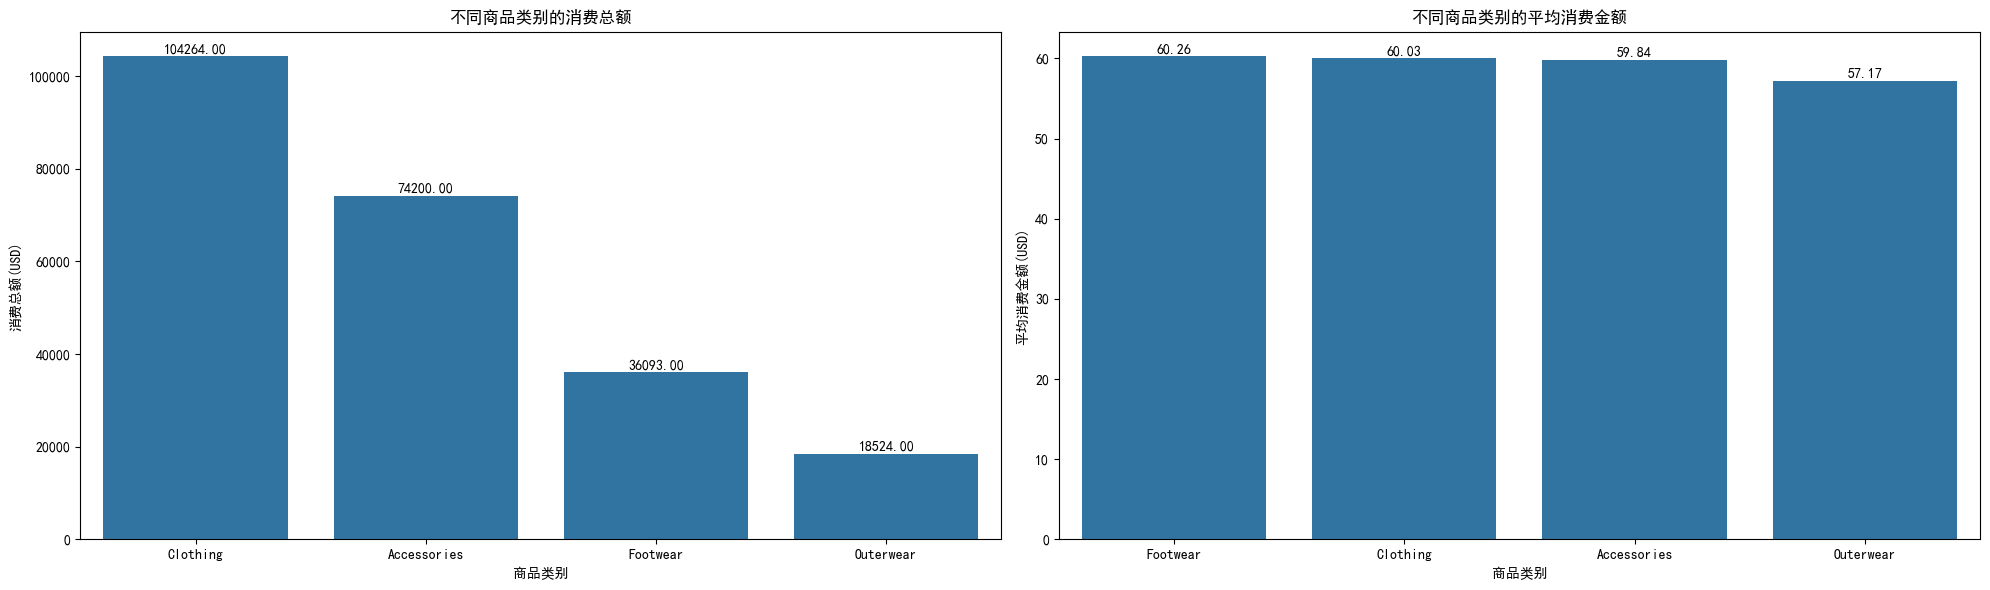

In [19]:
# 商品类别的销售情况
category_sales = data.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

# 不同类别商品的平均消费金额
category_avg_purchase = data.groupby('Category')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('不同商品类别的消费总额')
plt.xlabel('商品类别')
plt.ylabel('消费总额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(1, 2, 2)
sns.barplot(x=category_avg_purchase.index, y=category_avg_purchase.values)
plt.title('不同商品类别的平均消费金额')
plt.xlabel('商品类别')
plt.ylabel('平均消费金额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()

### 不同季节的商品销售额分析

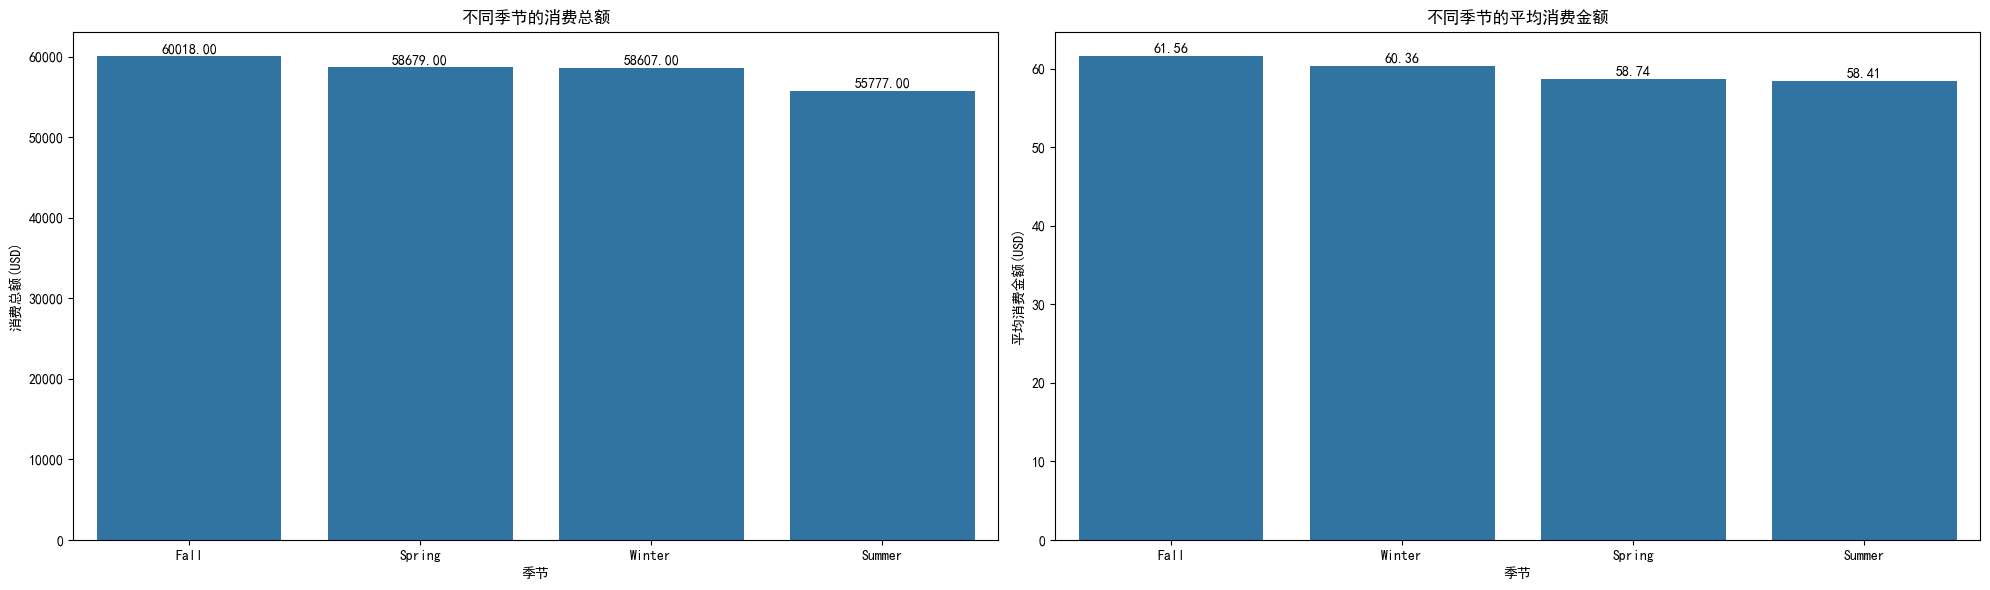

In [20]:
# 商品类别的销售情况
season_sales = data.groupby('Season')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

# 不同类别商品的平均消费金额
season_avg_purchase = data.groupby('Season')['Purchase Amount (USD)'].mean().sort_values(ascending=False)


plt.figure(figsize=(20, 6))

# 不同季节的消费总额
plt.subplot(1, 2, 1)
sns.barplot(x=season_sales.index, y=season_sales.values)
plt.title('不同季节的消费总额')
plt.xlabel('季节')
plt.ylabel('消费总额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# 不同季节的平均消费金额
plt.subplot(1, 2, 2)
sns.barplot(x=season_avg_purchase.index, y=season_avg_purchase.values)
plt.title('不同季节的平均消费金额')
plt.xlabel('季节')
plt.ylabel('平均消费金额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.tight_layout()
plt.show()

### 不同商品类别的商品销售情况分析

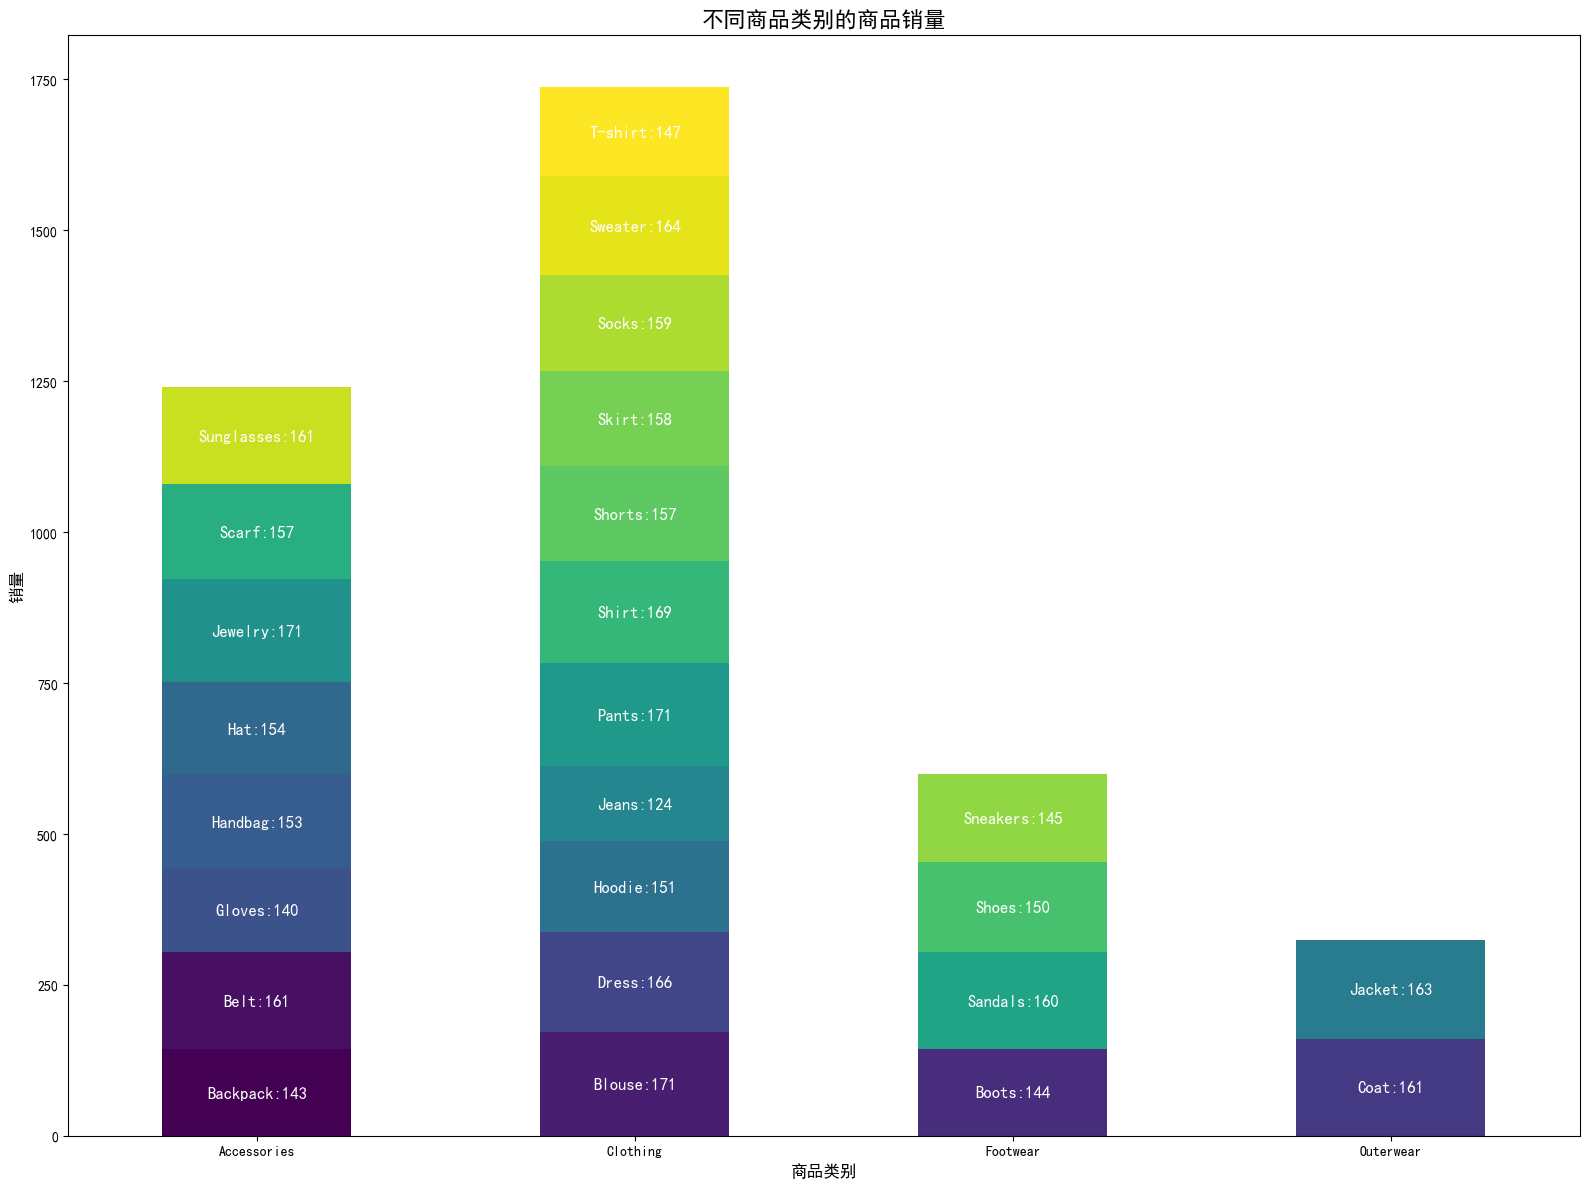

In [21]:
# 筛选出四个类别下的商品数据
categories_of_interest = ['Clothing', 'Accessories', 'Footwear', 'Outerwear']
filtered_data = data[data['Category'].isin(categories_of_interest)]

# 商品种类分析
item_counts = filtered_data.groupby('Category')['Item Purchased'].value_counts().unstack(fill_value=0)

# 创建堆叠条形图
ax = item_counts.plot(kind='bar', stacked=True, figsize=(16, 12), colormap='viridis', legend=False)

# 设置图表标题和坐标轴标签
ax.set_title('不同商品类别的商品销量', fontsize=16)
ax.set_xlabel('商品类别', fontsize=12)
ax.set_ylabel('销量', fontsize=12)

# 优化坐标轴刻度显示
ax.yaxis.get_major_formatter().set_scientific(False)

# 在每个颜色段上标注商品名称和数量
for i, category in enumerate(item_counts.index):
    y_offset = 0
    for item, count in item_counts.loc[category].items():
        if count > 0:
            ax.text(i, y_offset + count / 2, f'{item}:{count}', ha='center', va='center', fontsize=12, color='white',fontweight='bold')
            y_offset += count

# 显示图表
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

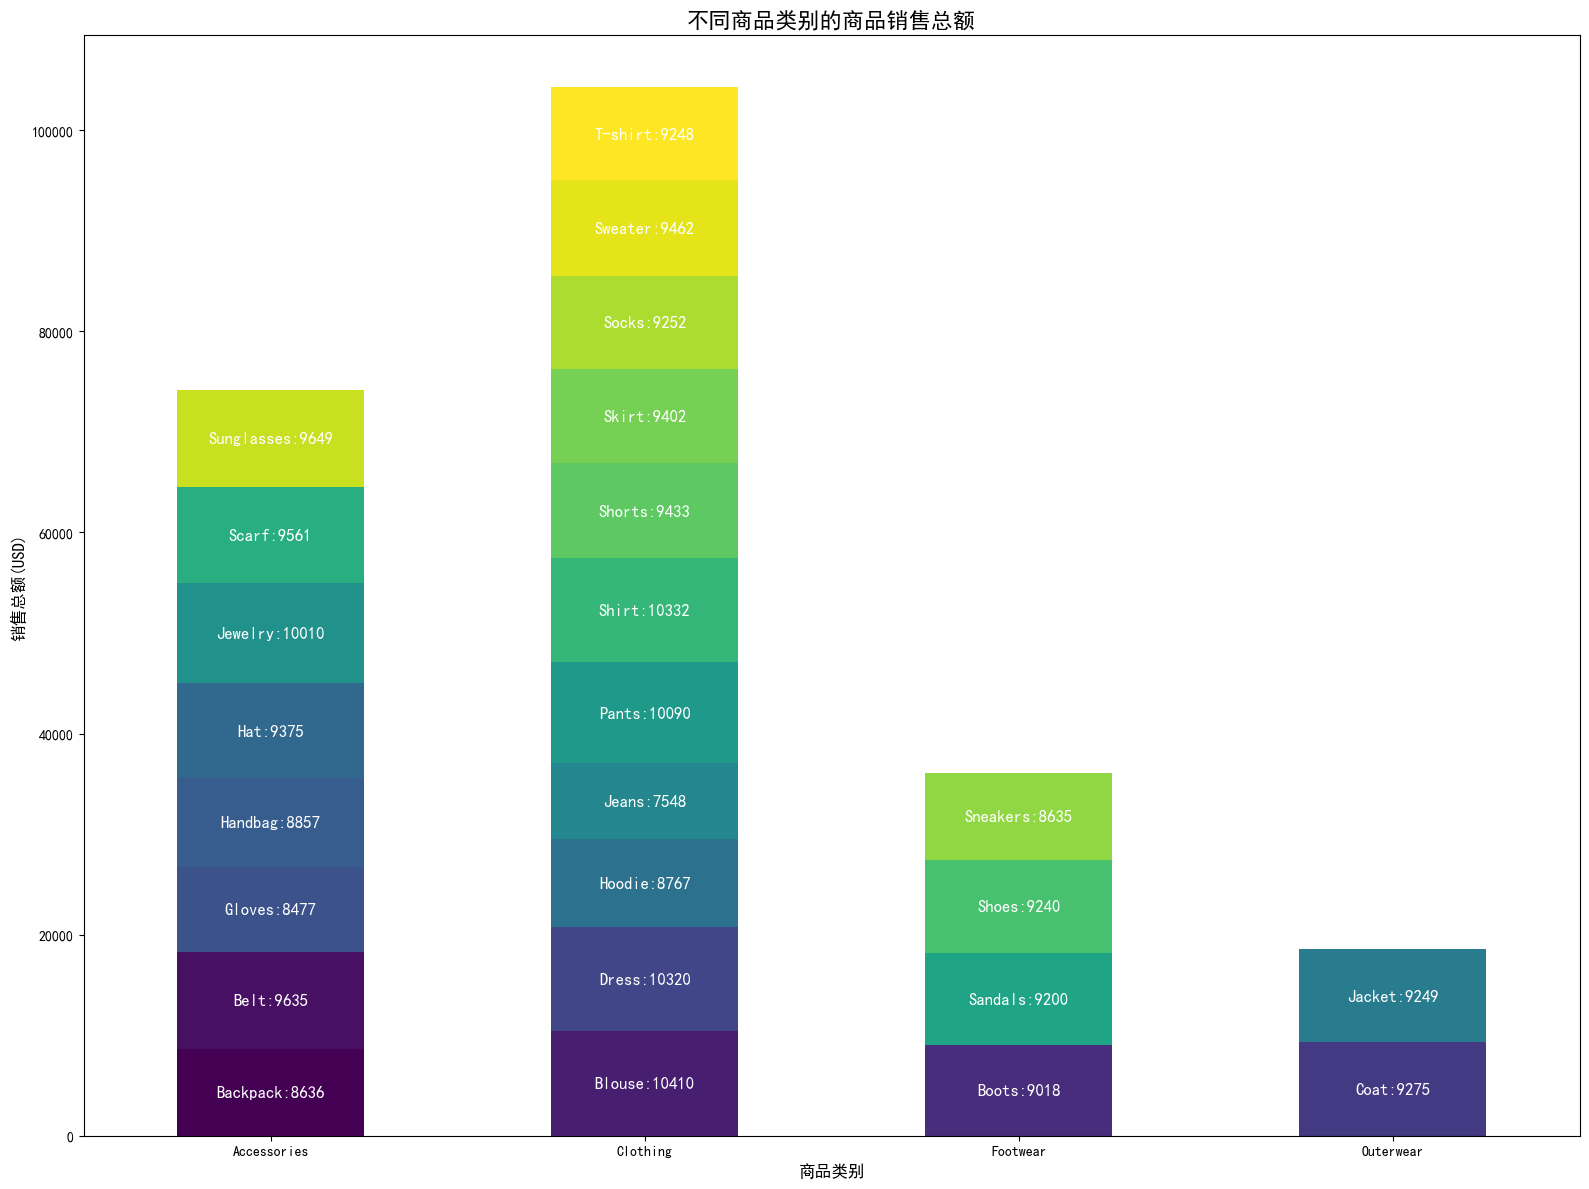

In [22]:
# 计算每个商品在每个类别下的销售总额
sales_amount = filtered_data.groupby('Category').apply(lambda x: x.groupby('Item Purchased')['Purchase Amount (USD)'].sum())

# 将sales_amount转换为DataFrame并进行适当的调整
sales_amount_df = sales_amount.unstack(fill_value=0)

# 创建堆叠条形图
ax = sales_amount_df.plot(kind='bar', stacked=True, figsize=(16, 12), colormap='viridis', legend=False)

# 设置图表标题和坐标轴标签
ax.set_title('不同商品类别的商品销售总额', fontsize=16)
ax.set_xlabel('商品类别', fontsize=12)
ax.set_ylabel('销售总额(USD)', fontsize=12)

# 优化坐标轴刻度显示
ax.yaxis.get_major_formatter().set_scientific(False)

# 在每个颜色段上标注商品名称和销售总额
for i, category in enumerate(sales_amount_df.index):
    y_offset = 0
    for item, amount in sales_amount_df.loc[category].items():
        if amount > 0:
            ax.text(i, y_offset + amount / 2, f'{item}:{amount}', ha='center', va='center', fontsize=12, color='white',fontweight='bold')
            y_offset += amount

# 显示图表
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

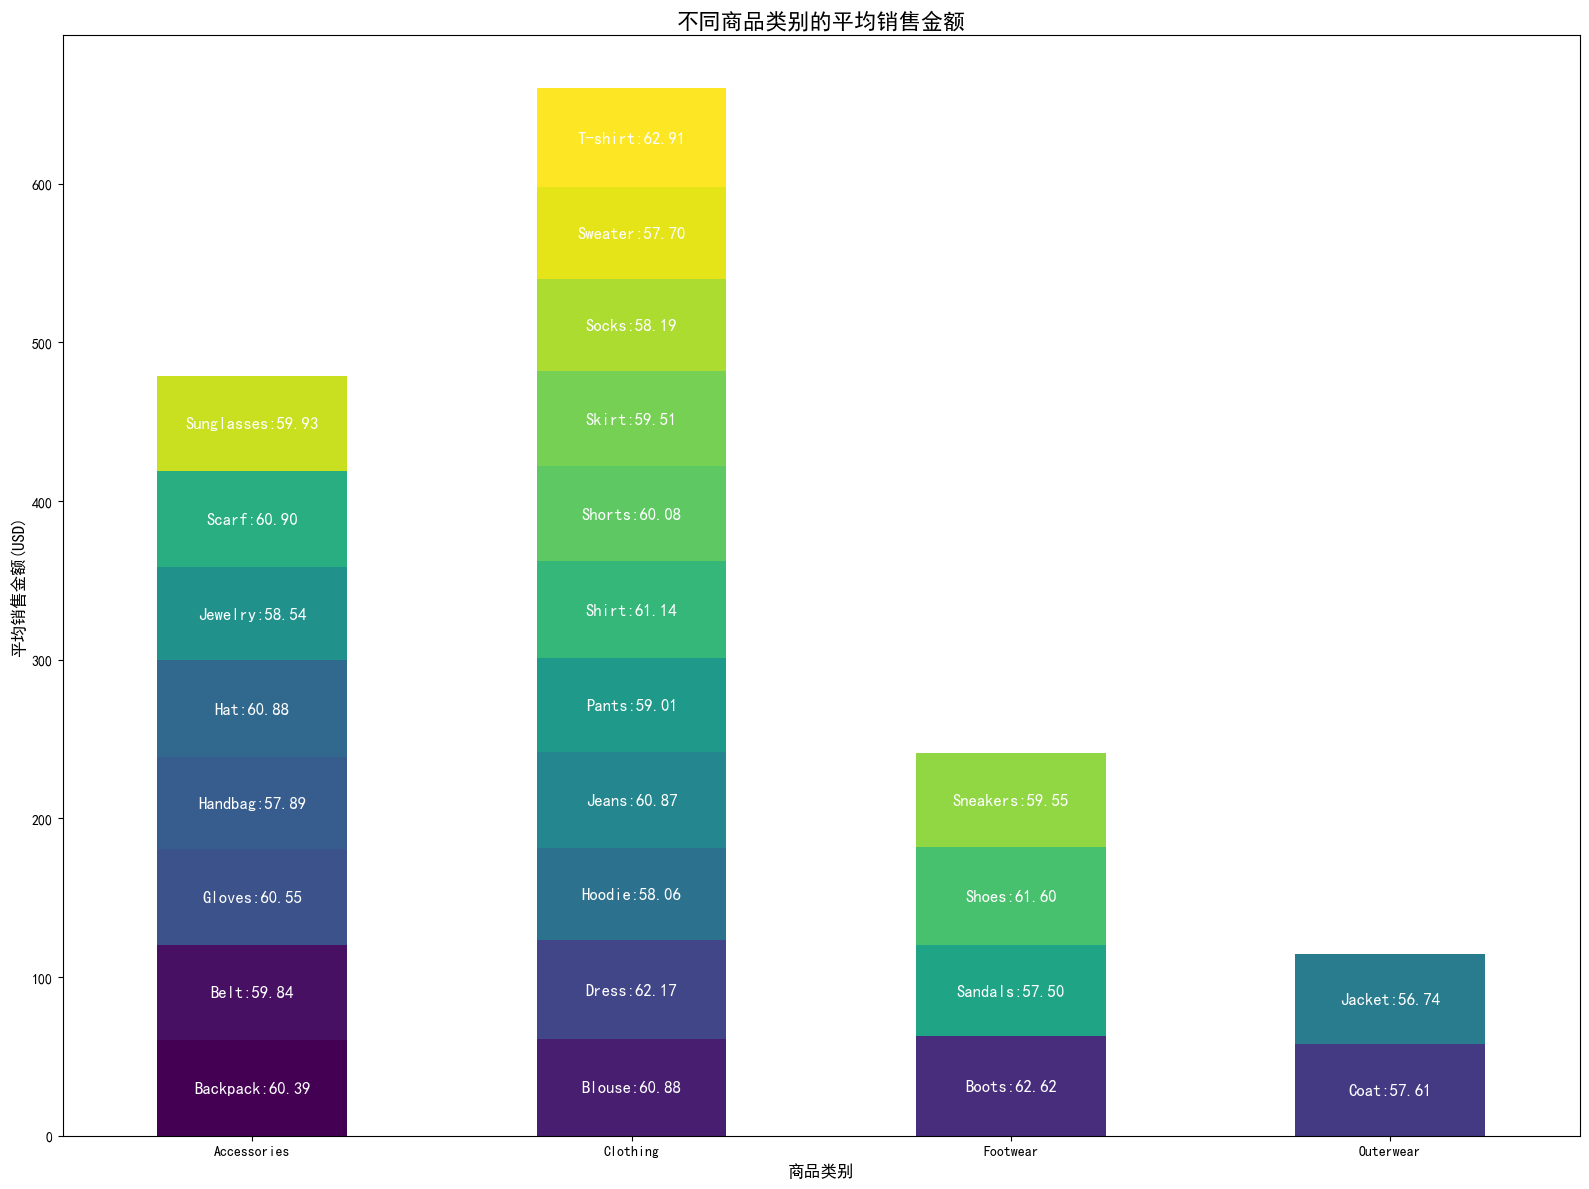

In [23]:
# 计算每个商品在每个类别下的平均销售金额
average_sales_amount = sales_amount_df.div(item_counts)

# 创建堆叠条形图
ax = average_sales_amount.plot(kind='bar', stacked=True, figsize=(16,12), colormap='viridis', legend=False)

# 设置图表标题和坐标轴标签
ax.set_title('不同商品类别的平均销售金额', fontsize=16)
ax.set_xlabel('商品类别', fontsize=12)
ax.set_ylabel('平均销售金额(USD)', fontsize=12)

# 优化坐标轴刻度显示
ax.yaxis.get_major_formatter().set_scientific(False)

# 在每个颜色段上标注商品名称和平均销售金额
for i, category in enumerate(average_sales_amount.index):
    y_offset = 0
    for item, amount in average_sales_amount.loc[category].items():
        if not np.isnan(amount):
            ax.text(i, y_offset + amount / 2, f'{item}:{amount:.2f}', ha='center', va='center', fontsize=12, color='white', fontweight='bold')
            y_offset += amount

# 显示图表
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 不同购买习惯的消费金额分析

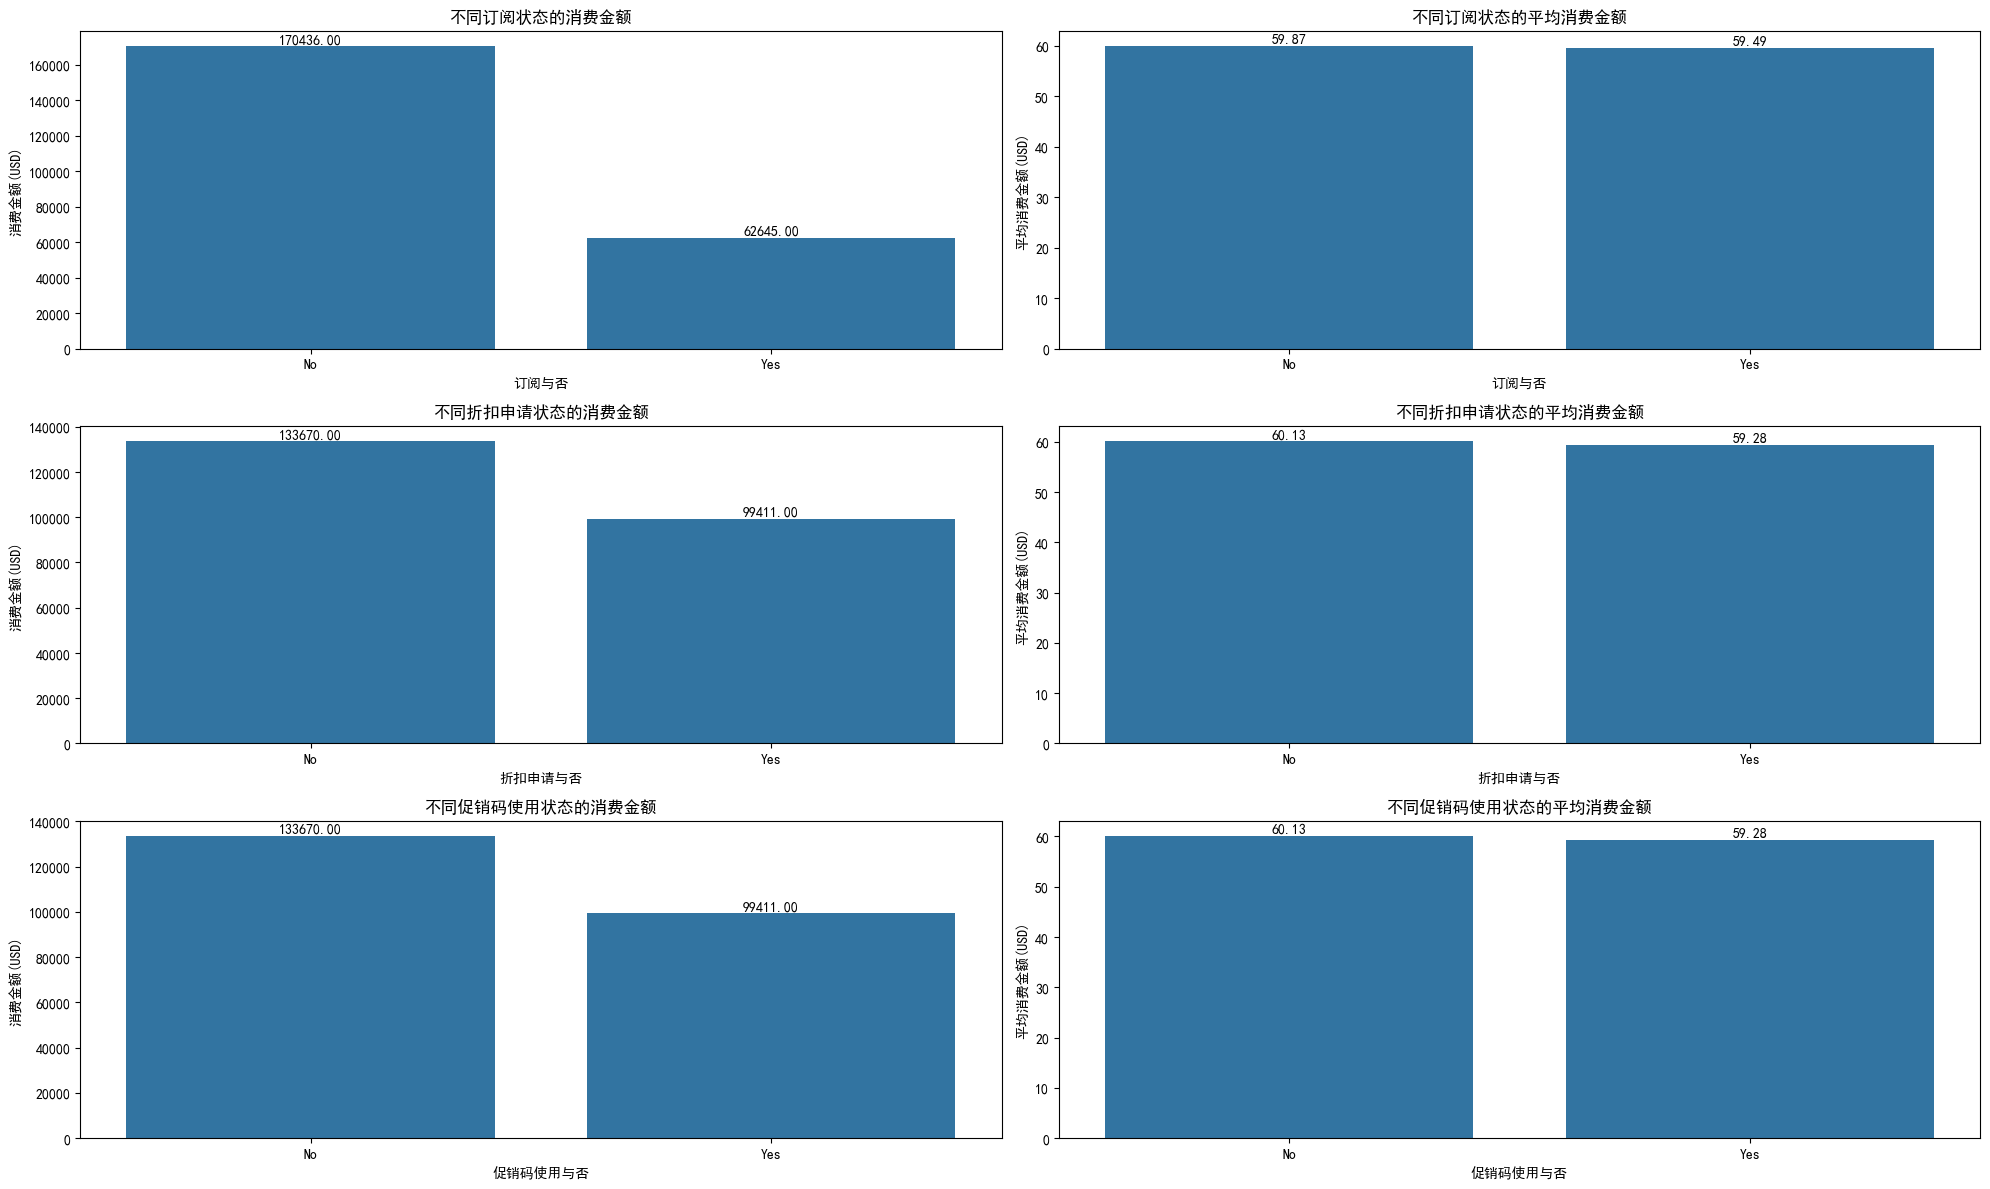

In [24]:
subscription_sales = data.groupby('Subscription Status')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
subscription_avg_sales = data.groupby('Subscription Status')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

discount_sales = data.groupby('Discount Applied')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
discount_avg_sales = data.groupby('Discount Applied')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

promo_sales = data.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
promo_avg_sales = data.groupby('Promo Code Used')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 12))

plt.subplot(3,2,1)
sns.barplot(x=subscription_sales.index, y=subscription_sales.values)
plt.title('不同订阅状态的消费金额')
plt.xlabel('订阅与否')
plt.ylabel('消费金额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(3,2,2)
sns.barplot(x=subscription_avg_sales.index, y=subscription_avg_sales.values)
plt.title('不同订阅状态的平均消费金额')
plt.xlabel('订阅与否')
plt.ylabel('平均消费金额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(3,2,3)
sns.barplot(x=discount_sales.index, y=discount_sales.values)
plt.title('不同折扣申请状态的消费金额')
plt.xlabel('折扣申请与否')
plt.ylabel('消费金额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(3,2,4)
sns.barplot(x=discount_avg_sales.index, y=discount_avg_sales.values)
plt.title('不同折扣申请状态的平均消费金额')
plt.xlabel('折扣申请与否')
plt.ylabel('平均消费金额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(3,2,5)
sns.barplot(x=promo_sales.index, y=promo_sales.values)
plt.title('不同促销码使用状态的消费金额')
plt.xlabel('促销码使用与否')
plt.ylabel('消费金额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.subplot(3,2,6)
sns.barplot(x=promo_avg_sales.index, y=promo_avg_sales.values)
plt.title('不同促销码使用状态的平均消费金额')
plt.xlabel('促销码使用与否')
plt.ylabel('平均消费金额(USD)')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()

## 斯皮尔曼相关性分析

In [25]:
from scipy.stats import spearmanr

def plot_spearmanr(data,features,title,wide,height):
    # 计算斯皮尔曼相关性矩阵和p值矩阵
    spearman_corr_matrix = data[features].corr(method='spearman')
    pvals = data[features].corr(method=lambda x, y: spearmanr(x, y)[1]) - np.eye(len(data[features].columns))

    # 转换 p 值为星号
    def convert_pvalue_to_asterisks(pvalue):
        if pvalue <= 0.001:
            return "***"
        elif pvalue <= 0.01:
            return "**"
        elif pvalue <= 0.05:
            return "*"
        return ""

    # 应用转换函数
    pval_star = pvals.applymap(lambda x: convert_pvalue_to_asterisks(x))

    # 转换成 numpy 类型
    corr_star_annot = pval_star.to_numpy()

    # 定制 labels
    corr_labels = spearman_corr_matrix.to_numpy()
    p_labels = corr_star_annot
    shape = corr_labels.shape

    # 合并 labels
    labels = (np.asarray(["{0:.2f}\n{1}".format(data, p) for data, p in zip(corr_labels.flatten(), p_labels.flatten())])).reshape(shape)

    # 绘制热力图
    fig, ax = plt.subplots(figsize=(height, wide), dpi=100, facecolor="w")
    sns.heatmap(spearman_corr_matrix, annot=labels, fmt='', cmap='coolwarm',
                vmin=-1, vmax=1, annot_kws={"size":10, "fontweight":"bold"},
                linecolor="k", linewidths=.2, cbar_kws={"aspect":13}, ax=ax)

    ax.tick_params(bottom=False, labelbottom=True, labeltop=False,
                left=False, pad=1, labelsize=12)
    ax.yaxis.set_tick_params(labelrotation=0)

    # 自定义 colorbar 标签格式
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(direction="in", width=.5, labelsize=10)
    cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
    cbar.set_ticklabels(["-1.00", "-0.50", "0.00", "0.50", "1.00"])
    cbar.outline.set_visible(True)
    cbar.outline.set_linewidth(.5)

    plt.title(title)
    plt.show()

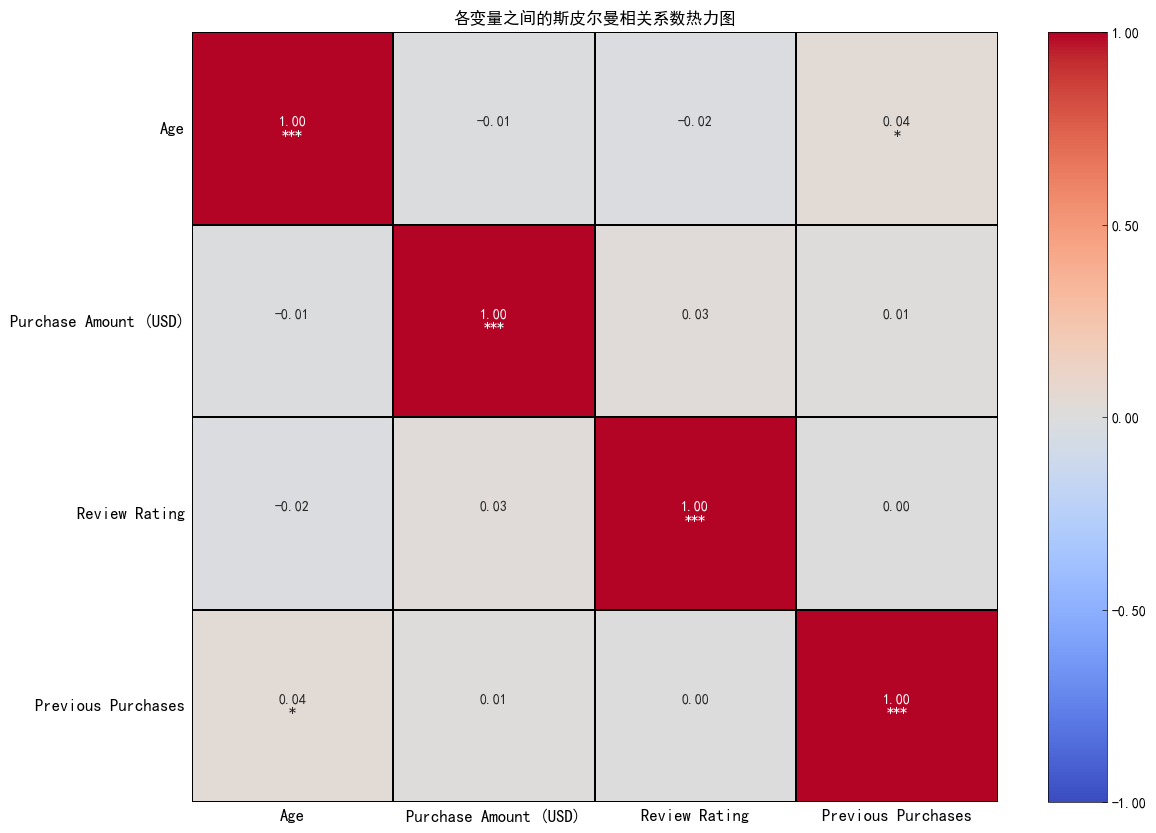

In [26]:
features = data.drop(['Customer ID'],axis=1).select_dtypes(include=['int64','float64']).columns.tolist()
plot_spearmanr(data,features,'各变量之间的斯皮尔曼相关系数热力图',10,13)

## K-Means聚类分析

In [27]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

#选择相关特征进行聚类
numerical_features = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
categorical_features = ['Gender', 'Category', 'Location', 'Subscription Status', 
                          'Payment Method', 'Shipping Type', 'Frequency of Purchases']
new_data = data[numerical_features + categorical_features].copy()

label_encoders = {}
for cat_feature in categorical_features:
    label_encoders[cat_feature] = LabelEncoder()
    new_data[cat_feature] = label_encoders[cat_feature].fit_transform(new_data[cat_feature])

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(new_data), columns=new_data.columns)

# 使用肘部法则来确定最佳聚类数
inertia = []
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=15).fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

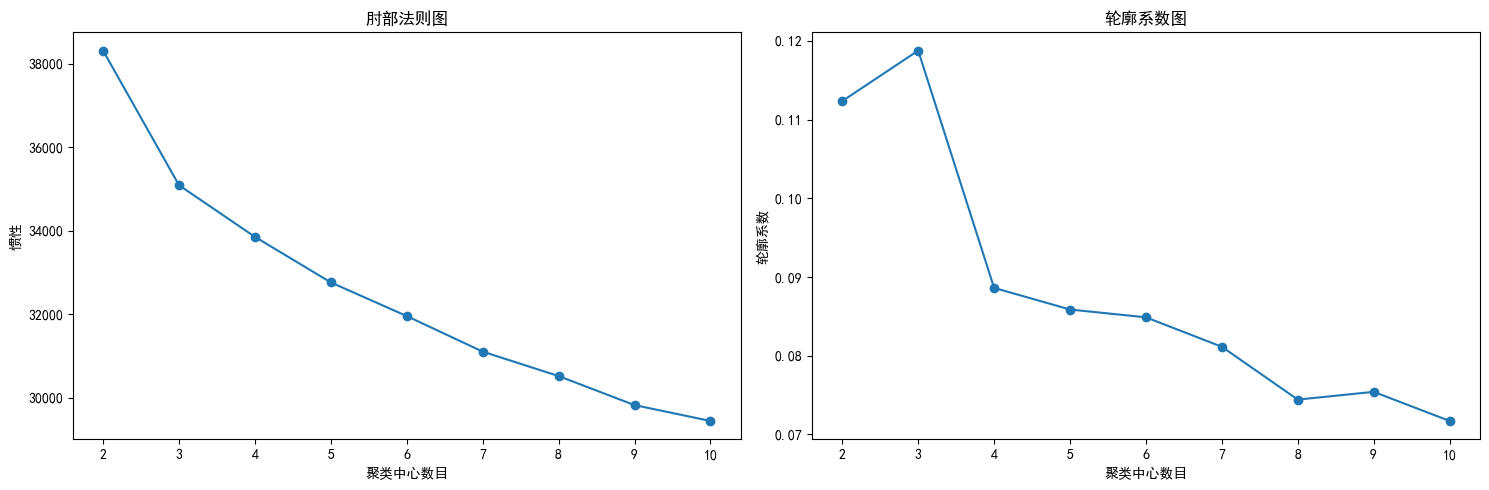

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('聚类中心数目')
plt.ylabel('惯性')
plt.title('肘部法则图')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('聚类中心数目')
plt.ylabel('轮廓系数')
plt.title('轮廓系数图')

plt.tight_layout()
plt.show()

In [29]:
kmeans = KMeans(n_clusters=3, random_state=15)
kmeans.fit(data_scaled)
# 获取聚类标签
cluster_labels = kmeans.labels_
# 将聚类标签添加到原始数据中以进行分析
data['Cluster'] = cluster_labels

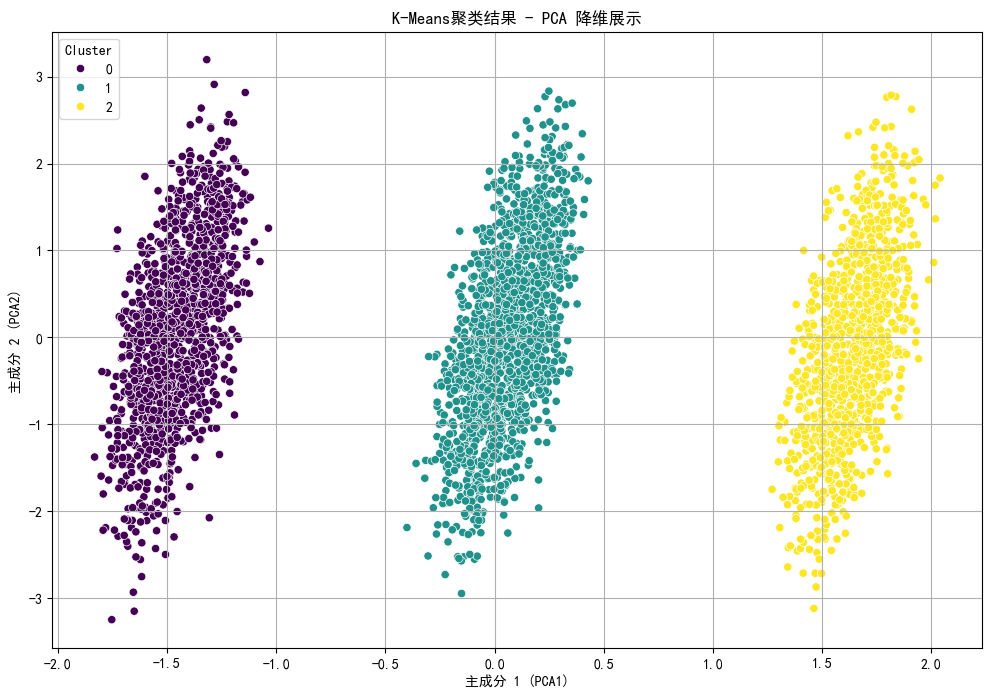

In [30]:
from sklearn.decomposition import PCA
# 使用 PCA 将数据降维到 2 维
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# 将 PCA 结果转为 DataFrame，并添加聚类标签
data_pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
data_pca_df['Cluster'] = cluster_labels

# 绘制 PCA 降维后的聚类结果
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data_pca_df['PCA1'], y=data_pca_df['PCA2'], hue=data_pca_df['Cluster'], palette='viridis', legend='full')
plt.title(f'K-Means聚类结果 - PCA 降维展示')
plt.xlabel('主成分 1 (PCA1)')
plt.ylabel('主成分 2 (PCA2)')
plt.legend(title='Cluster', loc='upper left')
plt.grid(True)
plt.show()

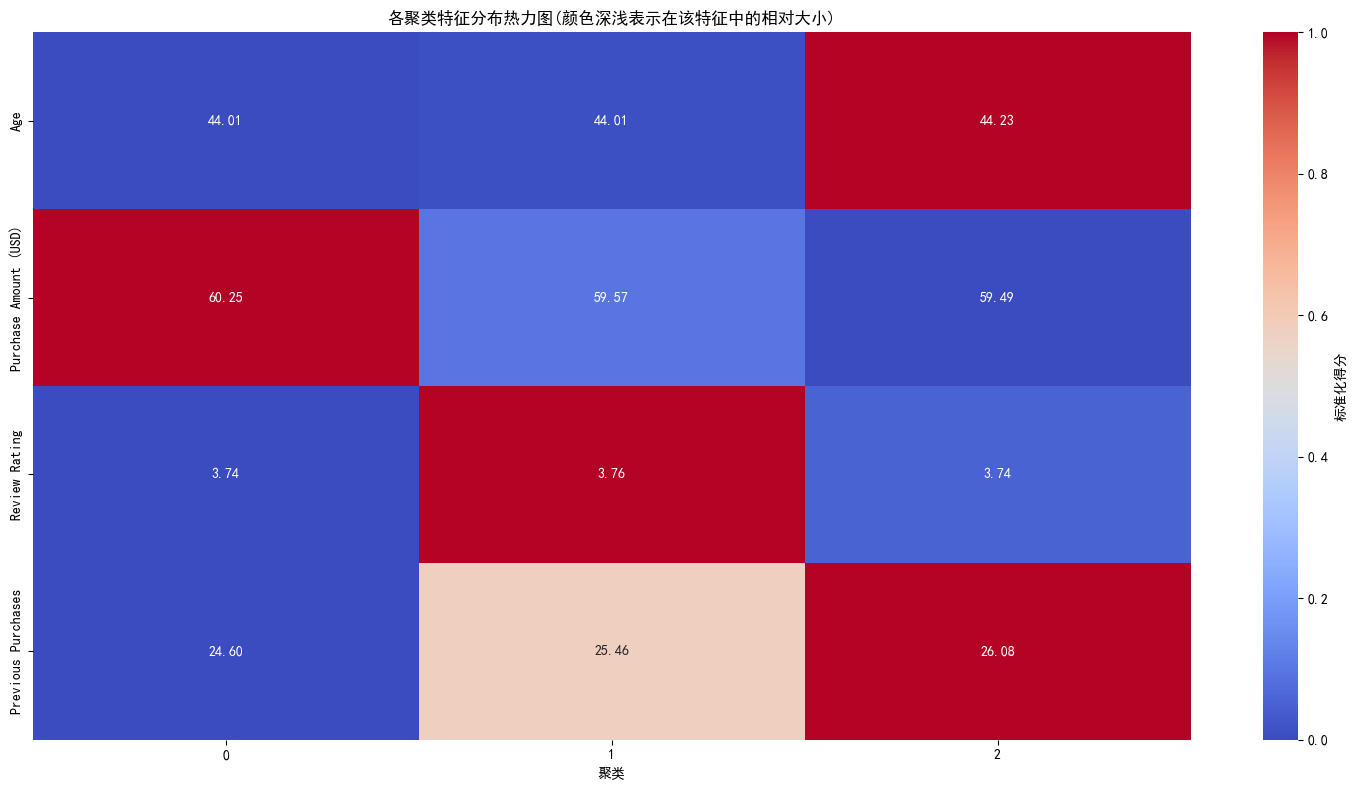

In [31]:
numerical_features = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
cluster_means = data.groupby('Cluster')[numerical_features].mean()

# 对每个特征进行归一化处理（每个特征单独归一化）
normalized_means = cluster_means.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

plt.figure(figsize=(15, 8))
sns.heatmap(normalized_means.T, 
            cmap='coolwarm',
            center=0.5,      
            vmin=0, 
            vmax=1,
            annot=cluster_means.T.round(2),  # 显示原始值而不是归一化后的值
            fmt='.2f',
            cbar_kws={'label': '标准化得分'})

plt.xlabel('聚类')
plt.title('各聚类特征分布热力图(颜色深浅表示在该特征中的相对大小)')
plt.tight_layout()
plt.show()

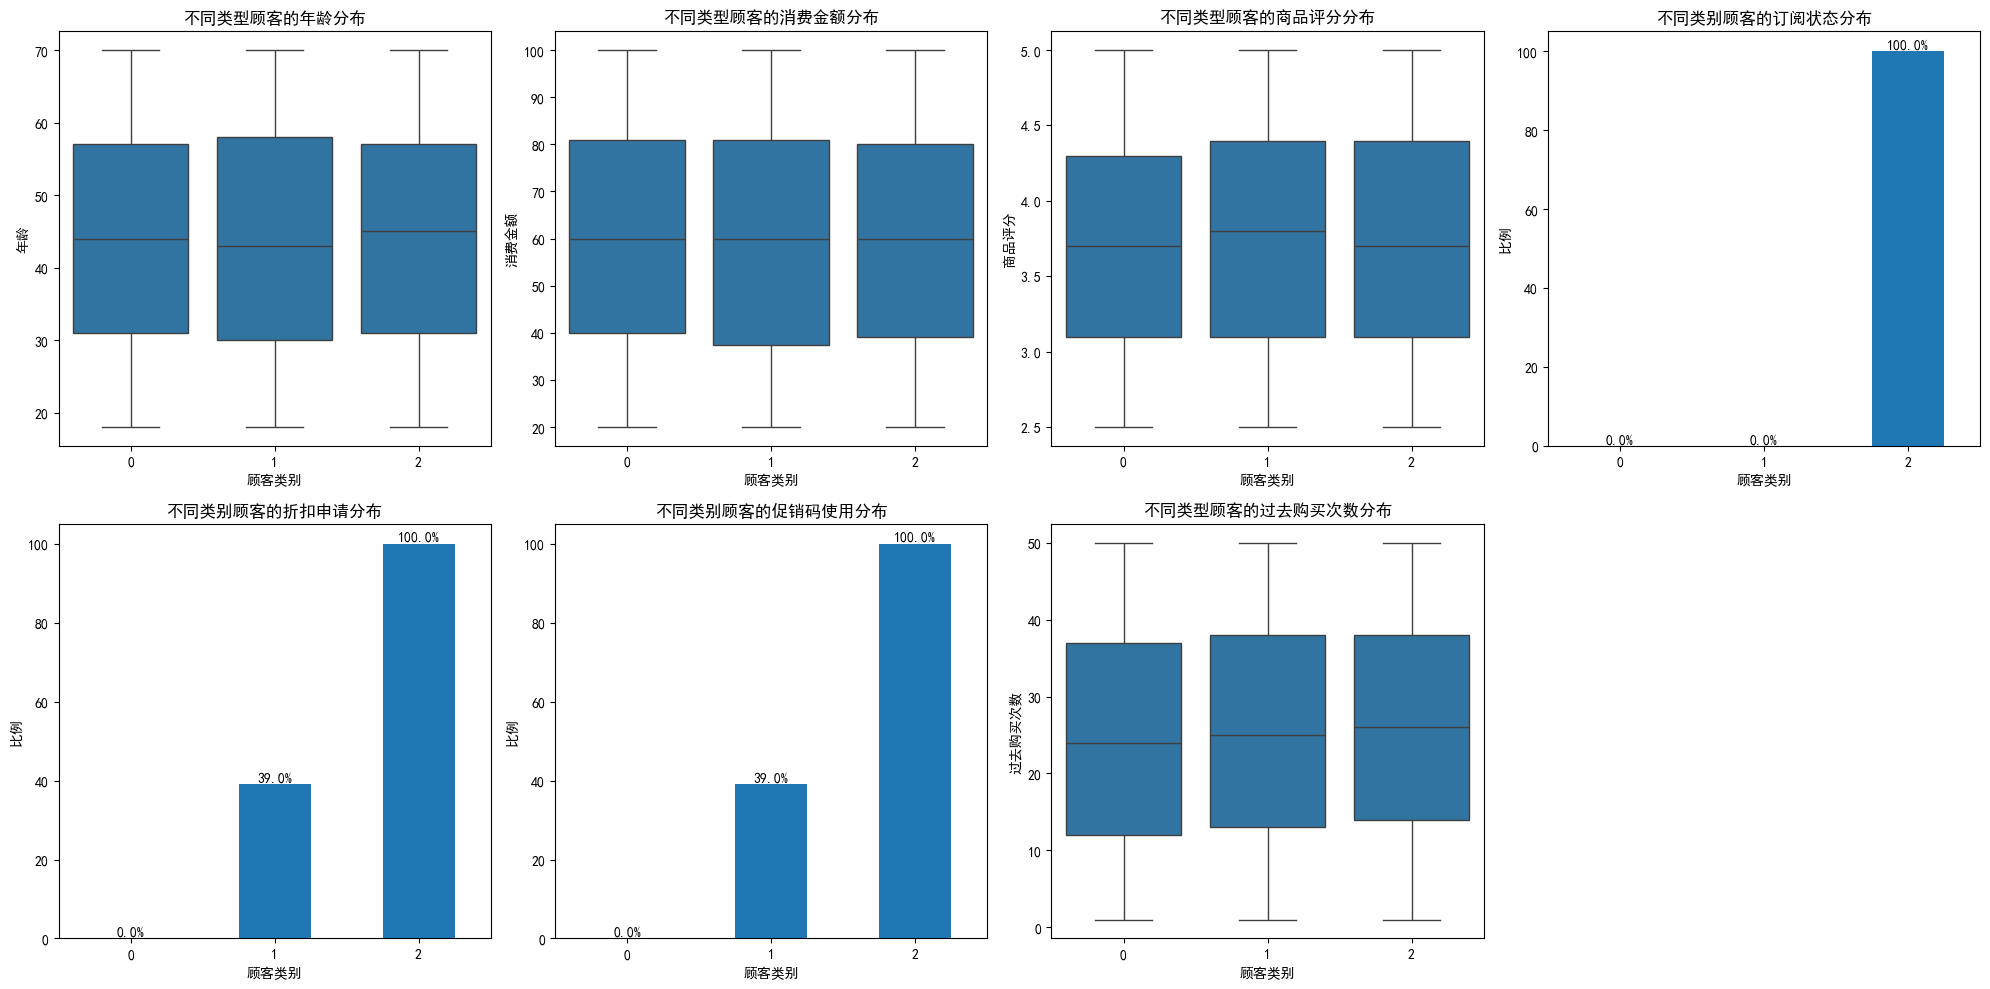

In [32]:
def plot_bar_chart(feature, title, xlabel, ylabel, position, data, fig):
    feature_and_cluster = pd.crosstab(data['Cluster'], data[feature])
    feature_and_cluster_percent = feature_and_cluster.div(feature_and_cluster.sum(axis=1), axis=0) * 100
    ax = fig.add_subplot(2, 4, position)  # 正确使用fig.add_subplot来创建子图
    feature_and_cluster_percent.iloc[:, 1].plot(kind='bar', ax=ax)  # 使用.iloc来访问第二列
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # 设置x轴标签旋转
    # 添加数据标签
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# 绘制特征的分布图
fig = plt.figure(figsize=(20, 10))

ax1 = plt.subplot(2, 4, 1)
sns.boxplot(x='Cluster', y='Age', data=data, ax=ax1)
plt.title('不同类型顾客的年龄分布')
plt.xlabel('顾客类别')
plt.ylabel('年龄')

ax2 = plt.subplot(2, 4, 2)
sns.boxplot(x='Cluster', y='Purchase Amount (USD)', data=data, ax=ax2)
plt.title('不同类型顾客的消费金额分布')
plt.xlabel('顾客类别')
plt.ylabel('消费金额')


ax3 = plt.subplot(2, 4, 3)
sns.boxplot(x='Cluster', y='Review Rating', data=data, ax=ax3)
plt.title('不同类型顾客的商品评分分布')
plt.xlabel('顾客类别')
plt.ylabel('商品评分')

plot_bar_chart('Subscription Status', '不同类别顾客的订阅状态分布', '顾客类别', '比例', 4, data, fig)
plot_bar_chart('Discount Applied', '不同类别顾客的折扣申请分布', '顾客类别', '比例', 5, data, fig)
plot_bar_chart('Promo Code Used', '不同类别顾客的促销码使用分布', '顾客类别', '比例', 6, data, fig)

ax7 = plt.subplot(2, 4, 7)
sns.boxplot(x='Cluster', y='Previous Purchases', data=data, ax=ax7)
plt.title('不同类型顾客的过去购买次数分布')
plt.xlabel('顾客类别')
plt.ylabel('过去购买次数')
plt.tight_layout()
plt.show()